# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# To plot using LaTeX, sometimes it gives trouble depending on your LaTeX installation,
# in that case set LaTeX = False
LaTeX = True

if LaTeX:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
def bold_latex(text, latex=LaTeX):
    if latex:
        return '\\textbf{' + text + '}' 
    else:
        return text

## Datos

In [3]:
train_df = pd.read_csv('../Data/EXIST2021_training.tsv', sep='\t')
train_df.head()

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist


In [4]:
test_df = pd.read_csv('../Data/EXIST2021_test.tsv', sep='\t')
test_df.head()

,test_case,id,source,language,text,task1,task2
0,EXIST2021,6978,gab,en,Pennsylvania State Rep horrifies with opening ...,non-sexist,non-sexist
1,EXIST2021,6979,twitter,en,"@iilovegrapes He sounds like as ass, and very ...",non-sexist,non-sexist
2,EXIST2021,6980,twitter,en,"@averyangryskel1 @4ARealistParty LOL! ""This be...",sexist,ideological-inequality
3,EXIST2021,6981,twitter,en,@WanderOrange @stalliontwink Rights?I mean yea...,sexist,ideological-inequality
4,EXIST2021,6982,twitter,en,the jack manifold appreciation i’m seeing is o...,non-sexist,non-sexist


## Análisis básico

En train todos son de Twitter, lo que es problemático ya que en test hay varios que provienen de Gab.

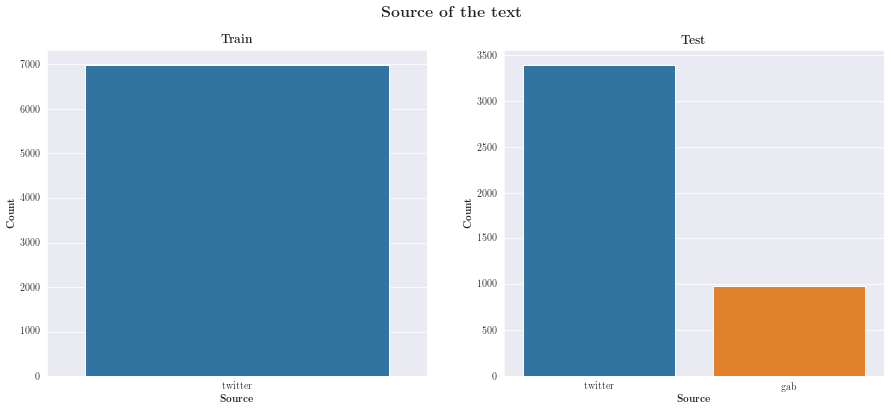

In [5]:
fig, (ax0, ax1) = plt.subplots(figsize=(15,6), nrows=1, ncols=2)

sns.countplot(data=train_df.sort_values('source'), x='source', ax=ax0)
ax0.set_xlabel(bold_latex('Source'), weight='bold')
ax0.set_ylabel(bold_latex('Count'), weight='bold')
ax0.set_title(bold_latex('Train'), weight='bold')

sns.countplot(data=test_df.sort_values('source', ascending=False), x='source', ax=ax1)
ax1.set_xlabel(bold_latex('Source'), weight='bold')
ax1.set_ylabel(bold_latex('Count'), weight='bold')
ax1.set_title(bold_latex('Test'), weight='bold')

fig.suptitle(bold_latex('Source of the text'), weight='bold', size=16)

plt.show()

fig.savefig('Images/source.pdf', bbox_inches='tight')

En cuanto al idioma, están casi balanceados.

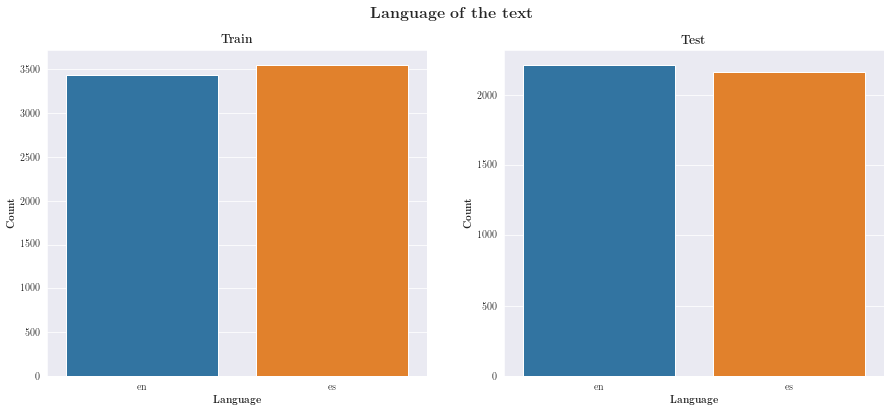

In [6]:
fig, (ax0, ax1) = plt.subplots(figsize=(15,6), nrows=1, ncols=2)

sns.countplot(data=train_df, x='language', ax=ax0)
ax0.set_xlabel(bold_latex('Language'), weight='bold')
ax0.set_ylabel(bold_latex('Count'), weight='bold')
ax0.set_title(bold_latex('Train'), weight='bold')

sns.countplot(data=test_df, x='language', ax=ax1)
ax1.set_xlabel(bold_latex('Language'), weight='bold')
ax1.set_ylabel(bold_latex('Count'), weight='bold')
ax1.set_title(bold_latex('Test'), weight='bold')

fig.suptitle(bold_latex('Language of the text'), weight='bold', size=16)

plt.show()

fig.savefig('Images/language.pdf', bbox_inches='tight')

En cuanto a la tarea de clasificación binaria, están casi balanceados entre no sexistas y sexistas.

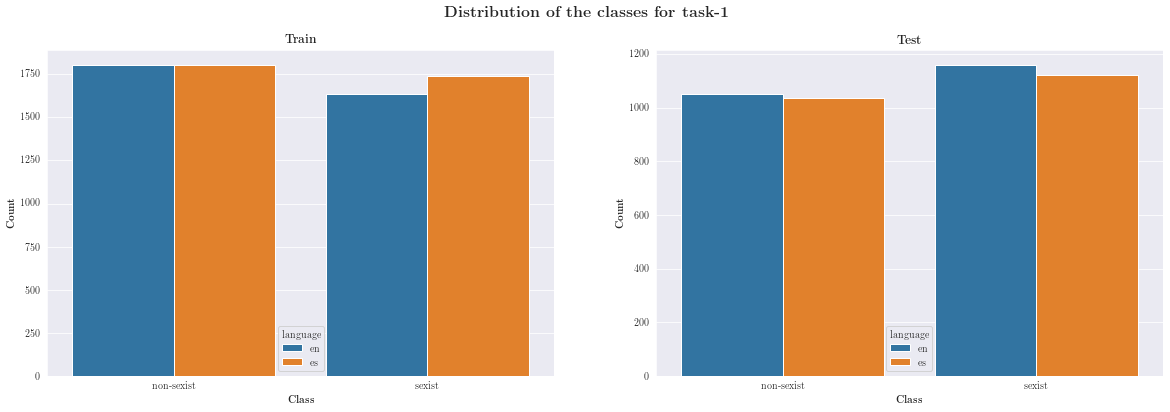

In [7]:
fig, (ax0, ax1) = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

sns.countplot(data=train_df.sort_values('task1'), x='task1', hue='language', ax=ax0)
ax0.set_xlabel(bold_latex('Class'), weight='bold')
ax0.set_ylabel(bold_latex('Count'), weight='bold')
ax0.set_title(bold_latex('Train'), weight='bold')

sns.countplot(data=test_df.sort_values('task1'), x='task1', hue='language', ax=ax1)
ax1.set_xlabel(bold_latex('Class'), weight='bold')
ax1.set_ylabel(bold_latex('Count'), weight='bold')
ax1.set_title(bold_latex('Test'), weight='bold')

fig.suptitle(bold_latex('Distribution of the classes for task-1'), weight='bold', size=16)

plt.show()

fig.savefig('Images/task1.pdf', bbox_inches='tight')

En cuanto a la tarea de detectar qué tipo de sexismo ya no están tan balanceadas las distintas clases.

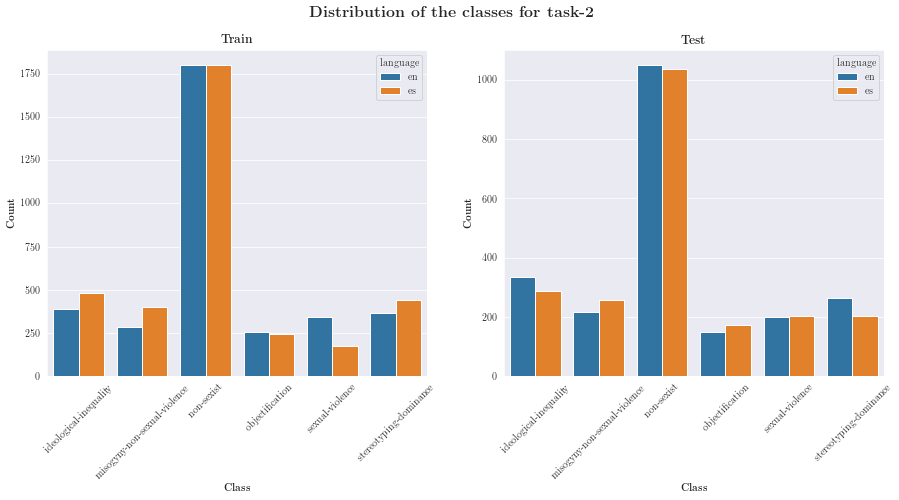

In [9]:
fig, (ax0, ax1) = plt.subplots(figsize=(15,6), nrows=1, ncols=2)

sns.countplot(data=train_df.sort_values('task2'), x='task2', hue='language', ax=ax0)
ax0.set_xlabel(bold_latex('Class'), weight='bold')
ax0.set_ylabel(bold_latex('Count'), weight='bold')
ax0.set_title(bold_latex('Train'), weight='bold')

for tick in ax0.get_xticklabels():
    tick.set_rotation(45)

sns.countplot(data=test_df.sort_values('task2'), x='task2', hue='language', ax=ax1)
ax1.set_xlabel(bold_latex('Class'), weight='bold')
ax1.set_ylabel(bold_latex('Count'), weight='bold')
ax1.set_title(bold_latex('Test'), weight='bold')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

fig.suptitle(bold_latex('Distribution of the classes for task-2'), weight='bold', size=16)

plt.show()

fig.savefig('Images/task2.pdf', bbox_inches='tight')